In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

In [5]:
df = pd.read_csv('Training_Dataset_v2.csv', low_memory=False)
df.head()


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [6]:
df = df.drop(['lead_time'], axis=1)
df.head()

,sku,national_inv,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [7]:
df = df.dropna()
df.isnull().sum()

sku                  0
national_inv         0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [8]:
y = df['went_on_backorder'].map({'No':0, 'Yes':1})
y

0          0
1          0
2          0
3          0
4          0
          ..
1687855    0
1687856    0
1687857    1
1687858    0
1687859    0
Name: went_on_backorder, Length: 1687860, dtype: int64

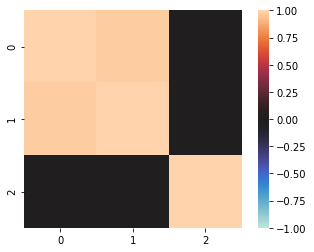

In [9]:
perf = df[['perf_6_month_avg', 'perf_12_month_avg']]
sales = df[['sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due']]
perf_cor = pd.concat([perf, y], axis=1, sort=False)
sales_cor = pd.concat([sales, y], axis=1, sort=False)
perf_cor = preprocessing.StandardScaler().fit(perf_cor).transform(perf_cor)
sales_cor = preprocessing.StandardScaler().fit(sales_cor).transform(sales_cor)
sales_cor = pd.DataFrame(sales_cor)
perf_cor = pd.DataFrame(perf_cor)
corr1 = perf_cor.corr()
ax = sns.heatmap(corr1, vmin=-1, vmax=1, center=0, square=True)


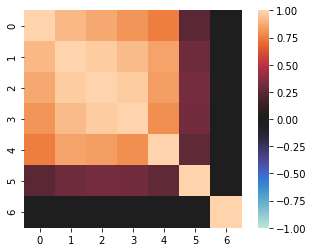

In [10]:
corr2 = sales_cor.corr()
ax2 = sns.heatmap(corr2, vmin=-1, vmax=1, center=0, square=True)

In [11]:
numvar = df[['national_inv', 'in_transit_qty', 'forecast_3_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 
            'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']]
catvar = df[['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop']]
catvar.head()
numvar.head()

,national_inv,in_transit_qty,forecast_3_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
3,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.13,0.0
4,8.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,-99.00,-99.00,0.0


In [13]:
catvar = pd.get_dummies(catvar)
X = pd.concat([numvar, catvar], axis=1, sort=False)
X

,national_inv,in_transit_qty,forecast_3_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,...,deck_risk_No,deck_risk_Yes,oe_constraint_No,oe_constraint_Yes,ppap_risk_No,ppap_risk_Yes,stop_auto_buy_No,stop_auto_buy_Yes,rev_stop_No,rev_stop_Yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,1,0,0,1,1,0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,1,0,0,1,1,0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,0,1,0,0,1,1,0
3,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,1,0,1,0,0,1,1,0
4,8.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,...,0,1,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,0.0,0.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,0.0,...,0,1,1,0,1,0,0,1,1,0
1687856,-1.0,0.0,5.0,9.0,1.0,3.0,3.0,8.0,0.0,0.0,...,1,0,1,0,1,0,0,1,1,0
1687857,-1.0,0.0,7.0,11.0,0.0,8.0,11.0,12.0,0.0,0.0,...,0,1,1,0,1,0,1,0,1,0
1687858,62.0,16.0,39.0,126.0,35.0,63.0,153.0,205.0,12.0,0.0,...,1,0,1,0,1,0,0,1,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)   # Preprocessing the data
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
LR = LogisticRegression(max_iter=1000, solver='saga', penalty='l1')
LR.fit(X_train, y_train)            # Fiting the logistic regression
yhat = LR.predict(X_test)
print("Logistic regression accuracy:", metrics.accuracy_score(y_test, yhat)) #Finding out the accuracy